### [EDA] 한국 대중음악 루프 사운드 생성 데이터 (ai hub)

#### 1. setting

In [32]:
# import libraries
import pandas as pd
import json
import zipfile
import io
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
# 폰트 설정

font_path = 'input font_file_path'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

#### 2. Data Load

In [7]:
# 데이터 로드

data_dir = './data'
zip_files = glob.glob(os.path.join(data_dir, '*.zip')) # aihub music data zip 파일 데이터 가져오기

if not zip_files:
    print("데이터 디렉토리에 zip 파일이 없습니다.")
else:
    print(f"총 {len(zip_files)}개의 ZIP 파일을 발견했습니다.")
    print("\n--- 데이터 불러오기 ---")

    data_list = [] # 모든 JSON 데이터를 저장할 리스트
    total_json_files = 0

    for zip_file_path in zip_files:
        try:
            with zipfile.ZipFile(zip_file_path, 'r') as zf:
                file_list = zf.namelist()
                json_files_in_this_zip = 0

                for file_name in file_list:
                    if file_name.endswith('.json'):
                        try:
                            with zf.open(file_name) as f:
                                with io.TextIOWrapper(f, encoding='utf-8') as text_reader:
                                    data = json.load(text_reader)
                                    df_normalized = pd.json_normalize(data['dataSet'])
                                    data_list.append(df_normalized)
                                    json_files_in_this_zip += 1
                        except json.JSONDecodeError:
                            print(f"  [오류] JSON 파싱 실패: {file_name}")
                        except Exception as e:
                            print(f"  [오류] 파일 처리 실패 {file_name}: {e}")
                
                total_json_files += json_files_in_this_zip
        except FileNotFoundError:
            print(f"ZIP 파일 탐색 실패: {zip_file_path}")
        except Exception as e:
            print(f"ZIP 파일 처리 실패 {zip_file_path}: {e}")

    if not data_list:
        print("유효한 JSON 데이터가 없습니다.")
    else:
        df = pd.concat(data_list, ignore_index=True)
        print(f"총 {len(zip_files)}개의 ZIP 파일, {total_json_files}개의 JSON 파일에서")
        print(f"총 {len(df)}개의 루프 데이터를 로드했습니다.")
        print("\n--- 데이터프레임 정보 ---")
        df.info()

총 87개의 ZIP 파일을 발견했습니다.

--- 데이터 불러오기 ---
총 87개의 ZIP 파일, 12000개의 JSON 파일에서
총 12000개의 루프 데이터를 로드했습니다.

--- 데이터프레임 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   version                  12000 non-null  object 
 1   loopIndex                12000 non-null  object 
 2   loopType                 12000 non-null  object 
 3   classification           12000 non-null  object 
 4   InstrumentType           12000 non-null  object 
 5   barCount                 12000 non-null  int64  
 6   isMain                   12000 non-null  object 
 7   chordWork                11000 non-null  object 
 8   bitrate                  12000 non-null  int64  
 9   playTime                 12000 non-null  float64
 10  srcType                  12000 non-null  object 
 11  srcFileName              12000 non-null  object 
 12  loopInfo.In

In [34]:
# 기본 데이터 정보 출력

print("데이터 샘플:")
print(df.head(), "\n")
print("--------------------------------\n")
print("데이터 정보:")
print(df.info(), "\n")
print("--------------------------------\n")
print("결측치 확인:")
print(df.isnull().sum(), "\n")

데이터 샘플:
  version loopIndex loopType classification InstrumentType  barCount isMain  \
0     1.0   0037215   melody           전자악기           Lead         2     No   
1     1.0   0037213   melody           전자악기           Lead         2     No   
2     1.0   0012368   rhythm            타악기          Drums         2    Yes   
3     1.0   0012410   rhythm            타악기          Drums         2    Yes   
4     1.0   0012392   rhythm            타악기          Drums         2    Yes   

                                           chordWork  bitrate  playTime  \
0  [{'chordStart': 0.0, 'chord': 'A'}, {'chordSta...    48000  3779.528   
1  [{'chordStart': 0.0, 'chord': 'Cm'}, {'chordSt...    48000  3779.528   
2                                                NaN    48000  6549.328   
3                                                NaN    48000  8571.432   
4                                                NaN    48000  6131.048   

  srcType                                    srcFileName  \
0    W

#### 3. EDA


A-1. 악기 종류(InstrumentType) 분포


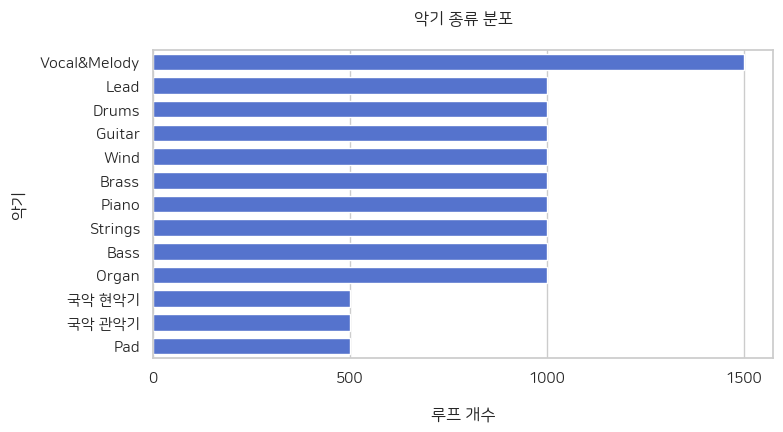


A-2. 악기 세부 분류(classification) 분포


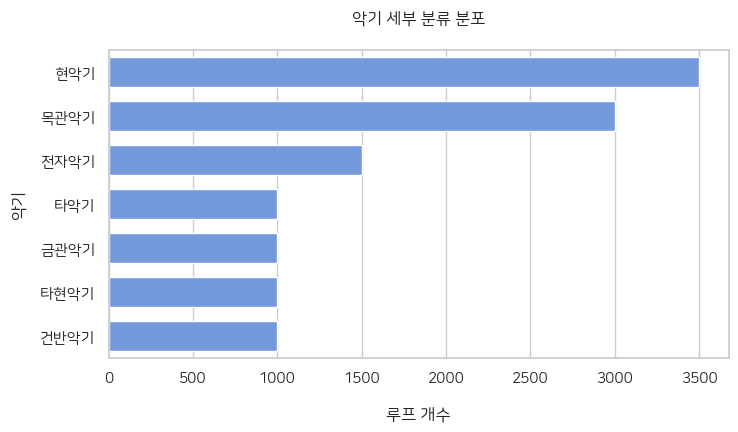


A-3. 음악 장르(loopInfo.genre) 분포


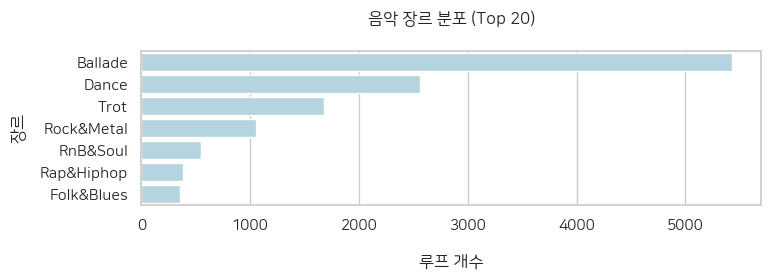


A-4. 음악 스타일(loopInfo.musicStyle) 분포


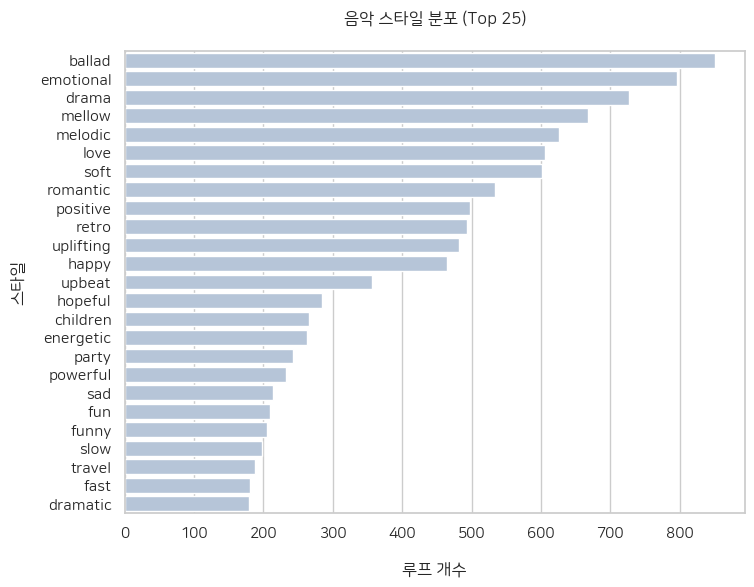

In [35]:
# ------------------------------------
# A. 범주형 데이터
# ------------------------------------
print("\nA-1. 악기 종류(InstrumentType) 분포")
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='InstrumentType', order = df['InstrumentType'].value_counts().index, width=0.7, color='royalblue')
plt.title('악기 종류 분포', pad=20)
plt.xlabel('루프 개수', labelpad=15)
plt.ylabel('악기', labelpad=10)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
plt.show()

print("\nA-2. 악기 세부 분류(classification) 분포")
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='classification', order = df['classification'].value_counts().index, width=0.7, color='cornflowerblue')
plt.title('악기 세부 분류 분포', pad=20)
plt.xlabel('루프 개수', labelpad=15)
plt.ylabel('악기', labelpad=10)
plt.show()

print("\nA-3. 음악 장르(loopInfo.genre) 분포")
plt.figure(figsize=(8, 2))
top_genres = df['loopInfo.genre'].value_counts().nlargest(20).index # 상위 20개 장르 선택
sns.countplot(data=df[df['loopInfo.genre'].isin(top_genres)], y='loopInfo.genre', order=top_genres, color='lightblue')
plt.title('음악 장르 분포 (Top 20)', pad=20)
plt.xlabel('루프 개수', labelpad=15)
plt.ylabel('장르', labelpad=10)
plt.show()

print("\nA-4. 음악 스타일(loopInfo.musicStyle) 분포")
plt.figure(figsize=(8, 6))
top_styles = df['loopInfo.musicStyle'].value_counts().nlargest(25).index # 상위 25개 스타일 선택
sns.countplot(data=df[df['loopInfo.musicStyle'].isin(top_styles)], y='loopInfo.musicStyle', order=top_styles, color='lightsteelblue')
plt.title('음악 스타일 분포 (Top 25)',pad=20)
plt.xlabel('루프 개수', labelpad=15)
plt.ylabel('스타일', labelpad=10)
plt.show()


B-1. BPM(loopInfo.bpm) 분포


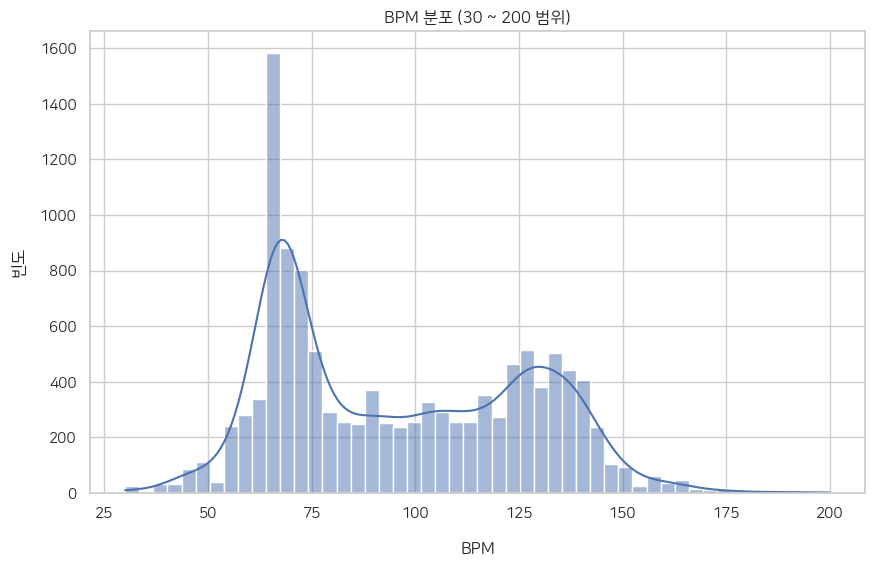


B-2. 음원 재생 시간(playTime) 분포


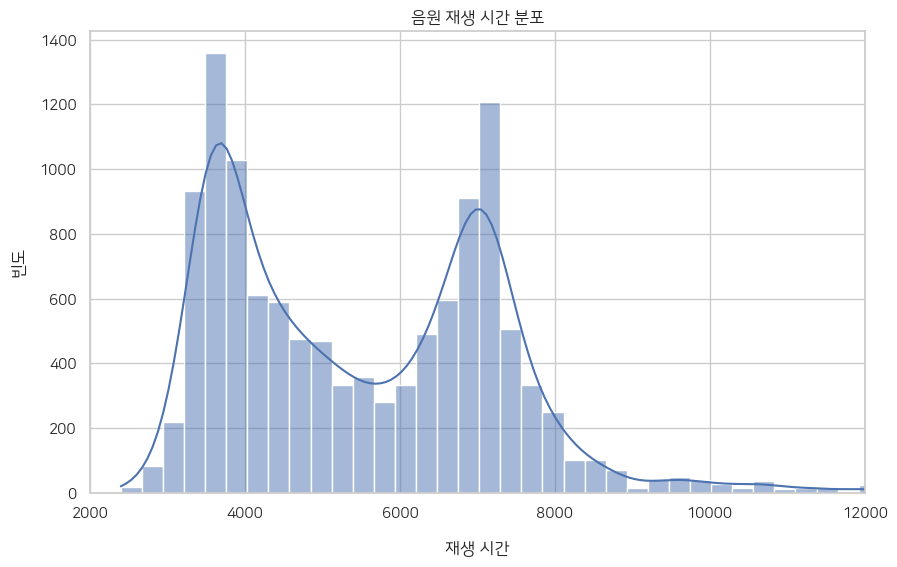

In [49]:
# ------------------------------------
# B. 수치형 데이터
# ------------------------------------
print("\nB-1. BPM(loopInfo.bpm) 분포")
plt.figure(figsize=(10, 6))
sns.histplot(df[(df['loopInfo.bpm'] >= 30) & (df['loopInfo.bpm'] <= 200)]['loopInfo.bpm'], bins=50, kde=True) # 30 ~ 200 BPM 범위의 데이터만 필터링
plt.title('BPM 분포 (30 ~ 200 범위)')
plt.xlabel('BPM', labelpad=15)
plt.ylabel('빈도',labelpad=10)
plt.show()

print("\nB-2. 음원 재생 시간(playTime) 분포")
plt.figure(figsize=(10, 6))
sns.histplot(df['playTime'], bins=50, kde=True).set_xlim(2000,12000) # 30 ~ 200 BPM 범위의 데이터만 필터링
plt.title('음원 재생 시간 분포')
plt.xlabel('재생 시간', labelpad=15)
plt.ylabel('빈도',labelpad=10)
plt.show()


B-2. 각 classification별 세부 악기 분포


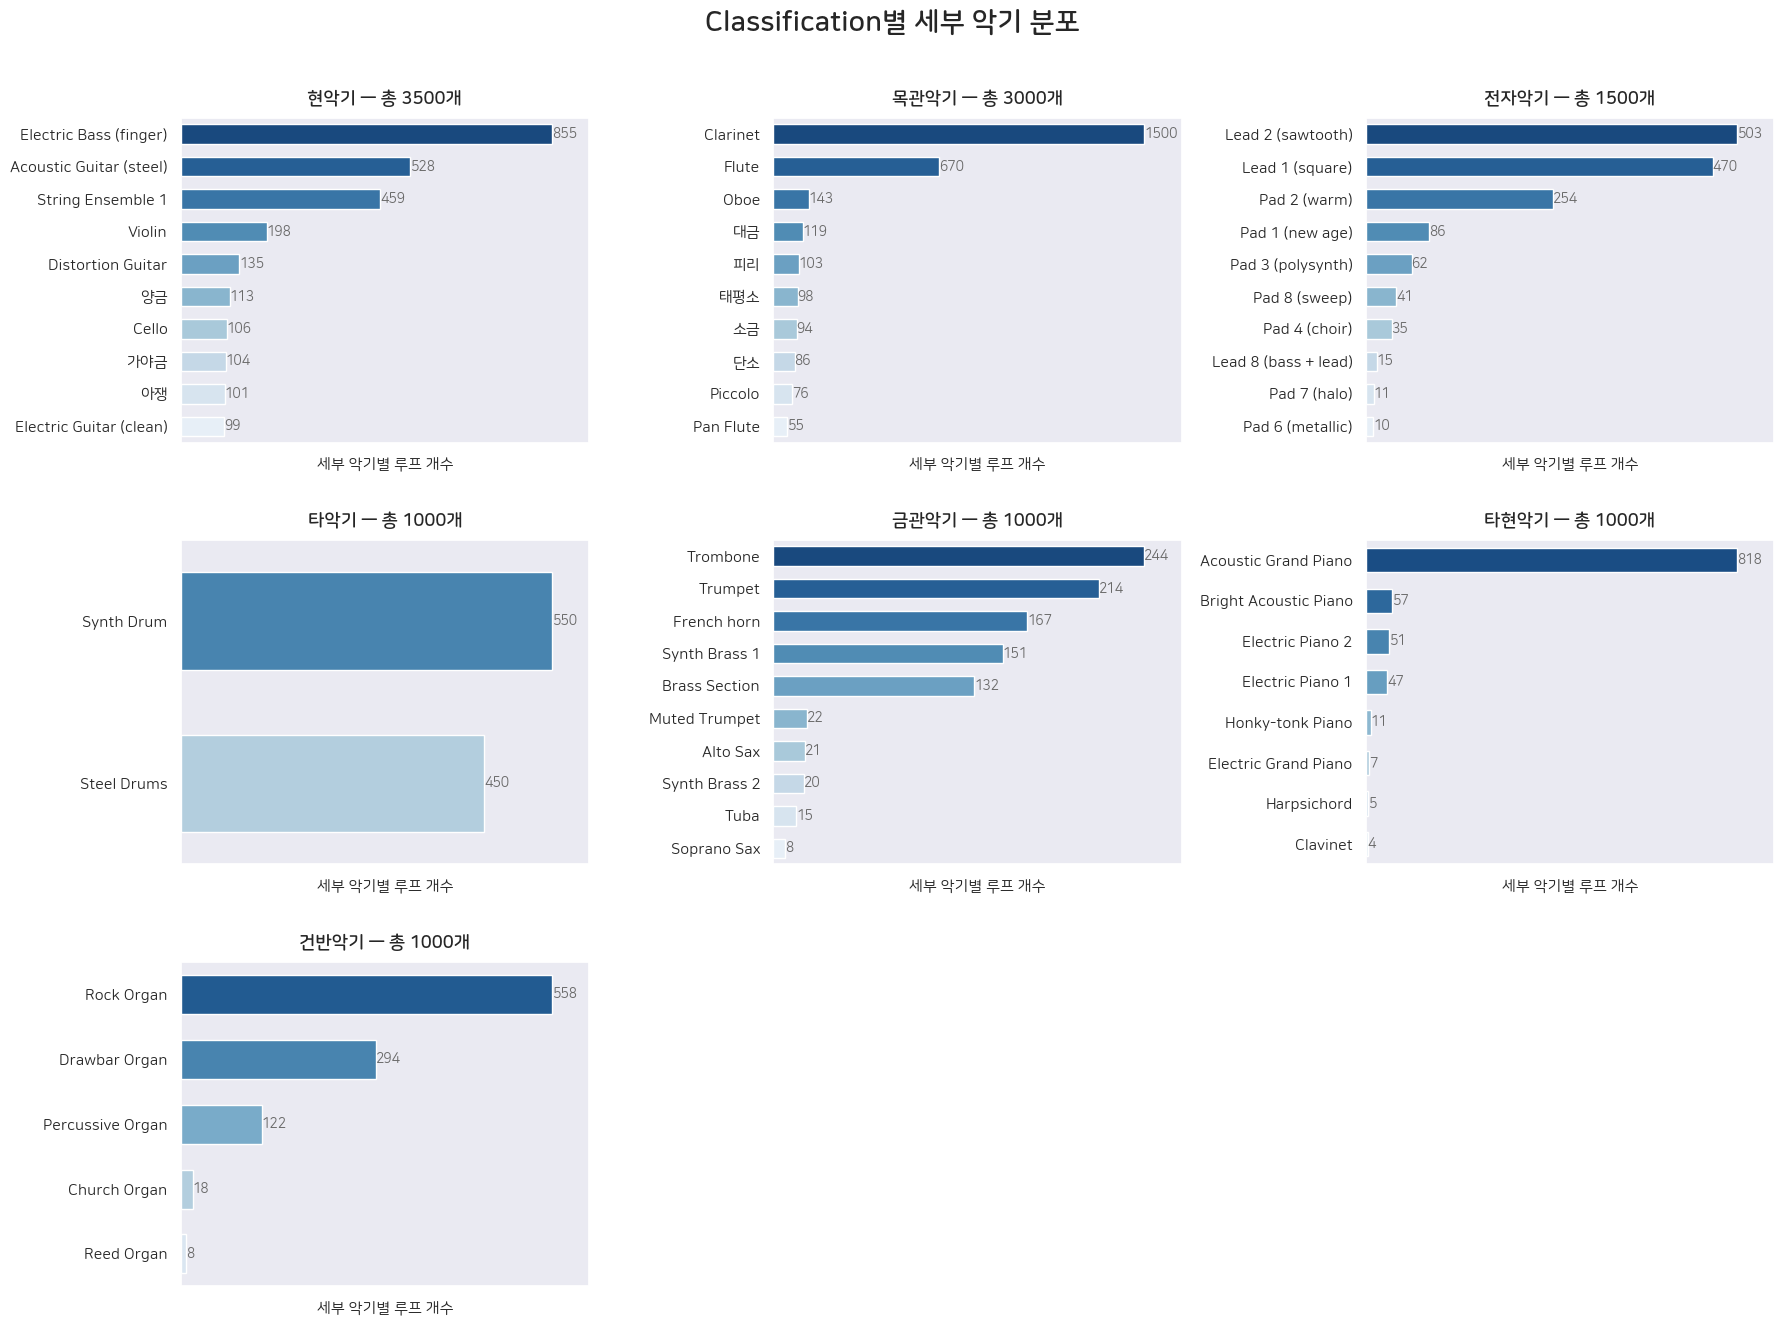

In [ ]:
print("\nB-3. 각 classification별 세부 악기 분포")

sns.set_theme(style="darkgrid", font=font_name)

class_counts = df['classification'].value_counts()
classification_order = class_counts.index.tolist()
n_classes = len(classification_order)

TOP_N = 10
n_cols = 3
n_rows = (n_classes + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4.5))
axes = axes.flatten()
fig.patch.set_facecolor('white')


for i, class_name in enumerate(classification_order):
    ax = axes[i]
    class_df = df[df['classification'] == class_name]
    instrument_counts = class_df['loopInfo.InstrumentName'].value_counts().nlargest(TOP_N)
    total_count = class_counts[class_name]

    palette = sns.color_palette("Blues_r", n_colors=len(instrument_counts))
    sns.barplot(
        x=instrument_counts.values,
        y=instrument_counts.index,
        ax=ax,
        palette=palette,
        hue=instrument_counts.index,
        width=0.6
    )

    for idx, val in enumerate(instrument_counts.values):
        ax.text(val, idx, f'{val}', va='center', ha='left', fontsize=10, color='dimgray')

    ax.set_title(f'{class_name} — 총 {total_count}개',
                    fontsize=13, fontweight='bold', pad=10)

    ax.set_xlabel('세부 악기별 루프 개수', fontsize=11, labelpad=10)
    ax.set_ylabel('', fontsize=10)
    ax.set_xticks([])

    max_val = instrument_counts.max()
    min_xlim = 5
    ax.set_xlim(0, max(max_val * 1.1, min_xlim))

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle(
    f'Classification별 세부 악기 분포',
    fontsize=20, fontweight='bold'
)
plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.3)
plt.show()



C-1. 주요 장르별 BPM 분포


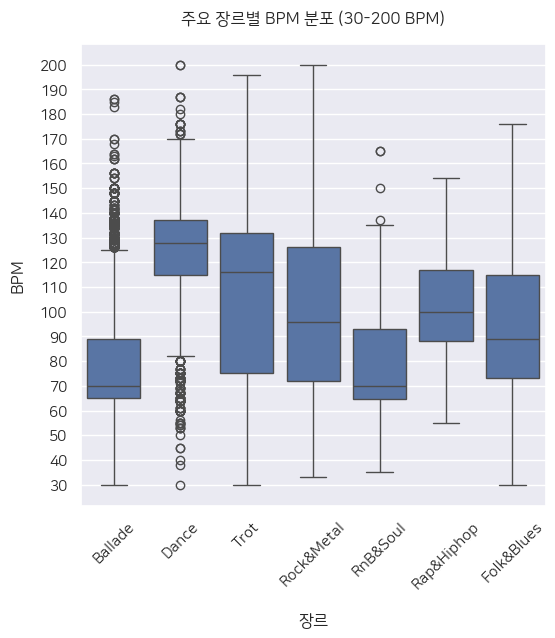


C-2. 메인 여부(isMain)와 루프 종류(loopType) 관계


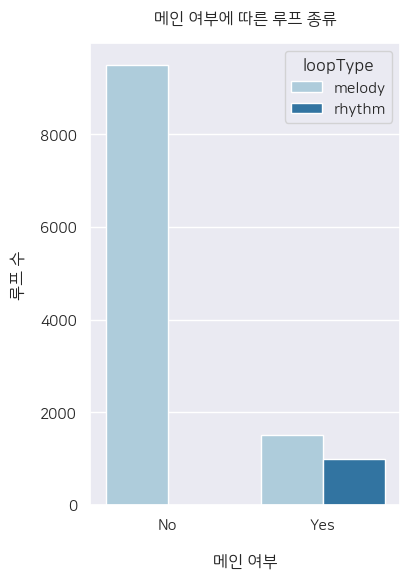


C-3. 장르(Genre)와 악기(InstrumentType) 관계


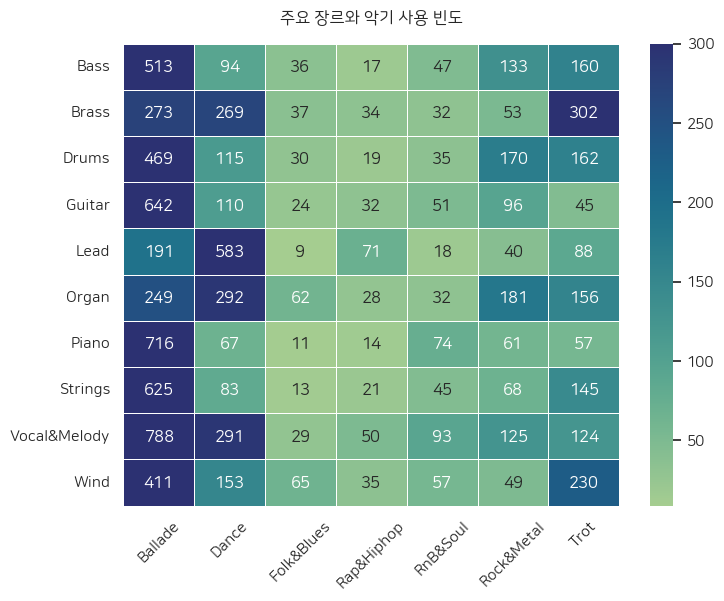

In [22]:
# ------------------------------------
# C. 데이터 간 관계
# ------------------------------------
print("\nC-1. 주요 장르별 BPM 분포")
plt.figure(figsize=(6, 6))
# '시각화 2'에서 사용한 상위 20개 장르 필터
df_top_genres = df[df['loopInfo.genre'].isin(top_genres)]
df_filtered_bpm = df_top_genres[(df_top_genres['loopInfo.bpm'] >= 30) & (df_top_genres['loopInfo.bpm'] <= 200)]
sns.boxplot(data=df_filtered_bpm, x='loopInfo.genre', y='loopInfo.bpm', order=top_genres,)
plt.title('주요 장르별 BPM 분포 (30-200 BPM)',pad=15)
plt.xlabel('장르',labelpad=15)
plt.ylabel('BPM', labelpad=10)
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

print("\nC-2. 메인 여부(isMain)와 루프 종류(loopType) 관계")
plt.figure(figsize=(4, 6))
sns.countplot(data=df, x='isMain', hue='loopType', palette='Paired')
plt.title('메인 여부에 따른 루프 종류',pad=15)
plt.xlabel('메인 여부', labelpad=15)
plt.ylabel('루프 수', labelpad=10)
plt.show()

print("\nC-3. 장르(Genre)와 악기(InstrumentType) 관계")
top_10_genres = df['loopInfo.genre'].value_counts().nlargest(10).index
top_10_instruments = df['InstrumentType'].value_counts().nlargest(10).index
df_heatmap_data = df[df['loopInfo.genre'].isin(top_10_genres) & df['InstrumentType'].isin(top_10_instruments)]
crosstab_data = pd.crosstab(df_heatmap_data['InstrumentType'], df_heatmap_data['loopInfo.genre'])

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='crest',vmax=300, linewidth=.5)
plt.title('주요 장르와 악기 사용 빈도',pad=15)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

##### D. 이외 특징 분석


D-1. 가장 많이 쓰는 코드


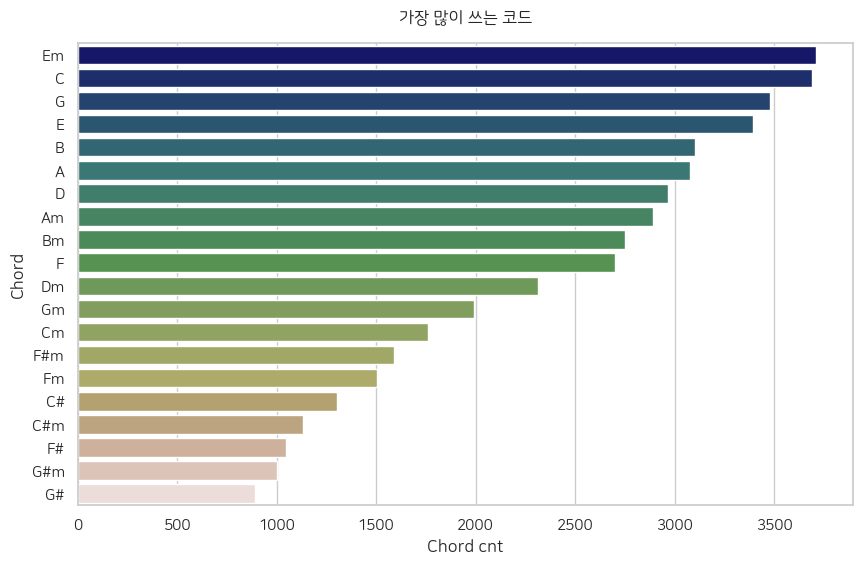

In [ ]:
print("\nD-1. 가장 많이 쓰는 코드 분포")

from collections import Counter

df_with_chords = df[df['chordWork'].map(lambda x: isinstance(x, list) and len(x) > 0)].copy()
df_with_chords['chord_sequence'] = df_with_chords['chordWork'].apply(
    lambda chords: [chord['chord'] for chord in chords]
)

all_chords = [chord for seq in df_with_chords['chord_sequence'] for chord in seq]
chord_counts = Counter(all_chords)

# 상위 20개 chord 시각화
top_n = 20
most_common_chords = chord_counts.most_common(top_n)
chords, counts = zip(*most_common_chords)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(chords), palette='gist_earth', hue=list(chords))
plt.title('가장 많이 쓰는 코드', pad=15)
plt.xlabel('Chord cnt', fontsize=12)
plt.ylabel('Chord', fontsize=12)
plt.show()



D-2. 코드 진행 분포 (2-gram)


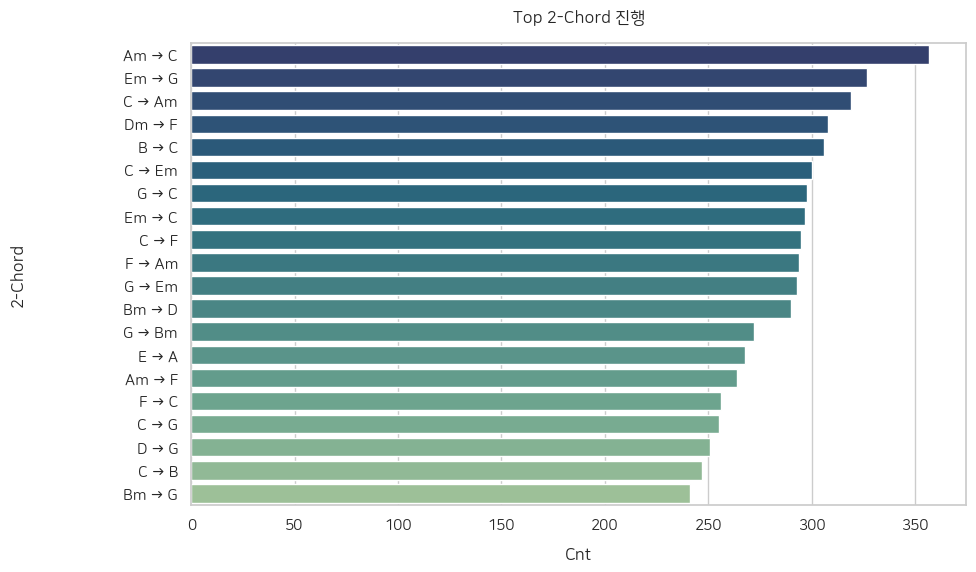


D-3. 코드 진행 분포 (3-gram)


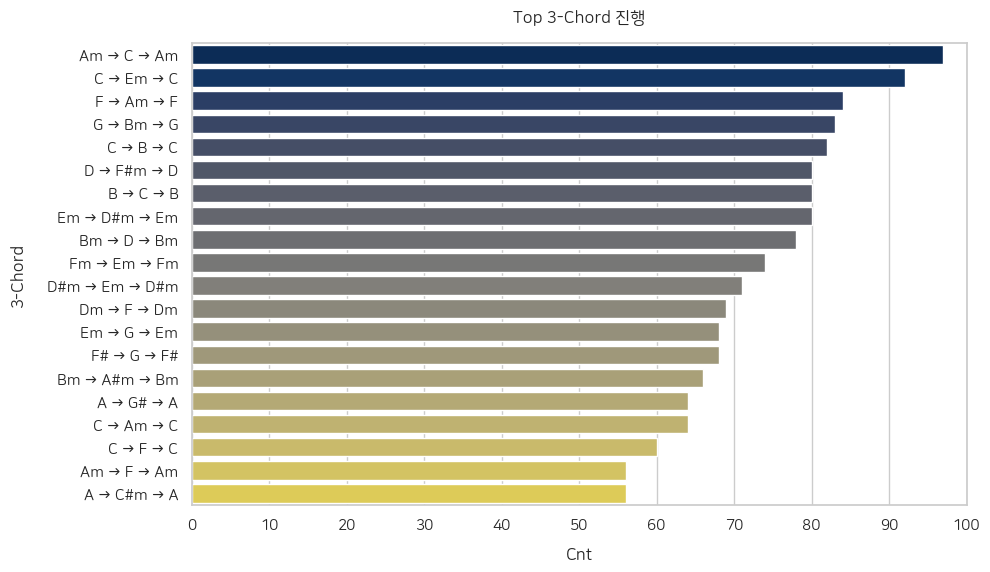

In [115]:
from itertools import islice

def ngrams(sequence, n):
    return [tuple(sequence[i:i+n]) for i in range(len(sequence)-n+1)]

# 2-gram
all_bigrams = [bg for seq in df_with_chords['chord_sequence'] for bg in ngrams(seq, 2)]
# 3-gram
all_trigrams = [tg for seq in df_with_chords['chord_sequence'] for tg in ngrams(seq, 3)]

bigram_counts = Counter(all_bigrams)
trigram_counts = Counter(all_trigrams)

top_n_prog = 20
print("\nD-2. 코드 진행 분포 (2-gram)")
most_common_bigrams = bigram_counts.most_common(top_n_prog)
if most_common_bigrams:
    patterns, counts = zip(*most_common_bigrams)
    patterns_str = [' → '.join(p) for p in patterns]

    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=patterns_str, palette='crest_r', hue=patterns_str)
    plt.title('Top 2-Chord 진행', pad=15)
    plt.xlabel('Cnt', labelpad=10)
    plt.ylabel('2-Chord', labelpad=70)
    plt.show()

print("\nD-3. 코드 진행 분포 (3-gram)")
most_common_trigrams = trigram_counts.most_common(top_n_prog)
if most_common_trigrams:
    patterns, counts = zip(*most_common_trigrams)
    patterns_str = [' → '.join(p) for p in patterns]

    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=patterns_str, palette='cividis', hue=patterns_str).set_xlim(0,100)
    plt.title('Top 3-Chord 진행', pad=15)
    plt.xlabel('Cnt', labelpad=10)
    plt.ylabel('3-Chord', labelpad=15)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    plt.show()
